In [224]:
from bs4 import BeautifulSoup
import os
import pandas as pd

In [229]:
df_list = []
folder = 'rt_html'

for movie in os.listdir(folder): #list of all names in the folder dir
    with open(os.path.join(folder, movie)) as file: # open each file as if we are getting request > response
        #passing response file to the constructor of beautiful soup
        soup = BeautifulSoup(file,'lxml')
        # Note: a correct implementation may take ~15 seconds to run
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')] # getting title of each movie in each response page , find contents returns list
        audience_score =  soup.find('div' , {'class': 'audience-score meter'}).find('span').contents[0][:-1]
        num_audience_ratings = soup.find('div' , {'class': 'audience-info hidden-xs superPageFontColor'})
        num_audience_ratings = num_audience_ratings.find_all('div')[1].contents[2].strip().replace(',','')
        critic = soup.find('div', class_ ="critic-score meter").find_all('span')[1].contents[0].contents[0]
        df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings),
                        'critic':int(critic)
                    })




In [230]:
df = pd.DataFrame(df_list, columns = ['title', 'audience_score', 'number_of_audience_ratings','critic'])
df.head(10)

,title,audience_score,number_of_audience_ratings,critic
0,12 Angry Men (Twelve Angry Men) (1957),97,103672,100
1,The 39 Steps (1935),86,23647,98
2,The Adventures of Robin Hood (1938),89,33584,100
3,All About Eve (1950),94,44564,100
4,All Quiet on the Western Front (1930),89,17768,100
5,Casablanca (1942),95,355952,97
6,Frankenstein (1931),87,41140,100
7,King Kong (1933),86,89669,98
8,Laura (1944),91,10481,100
9,M (1931),95,35778,100


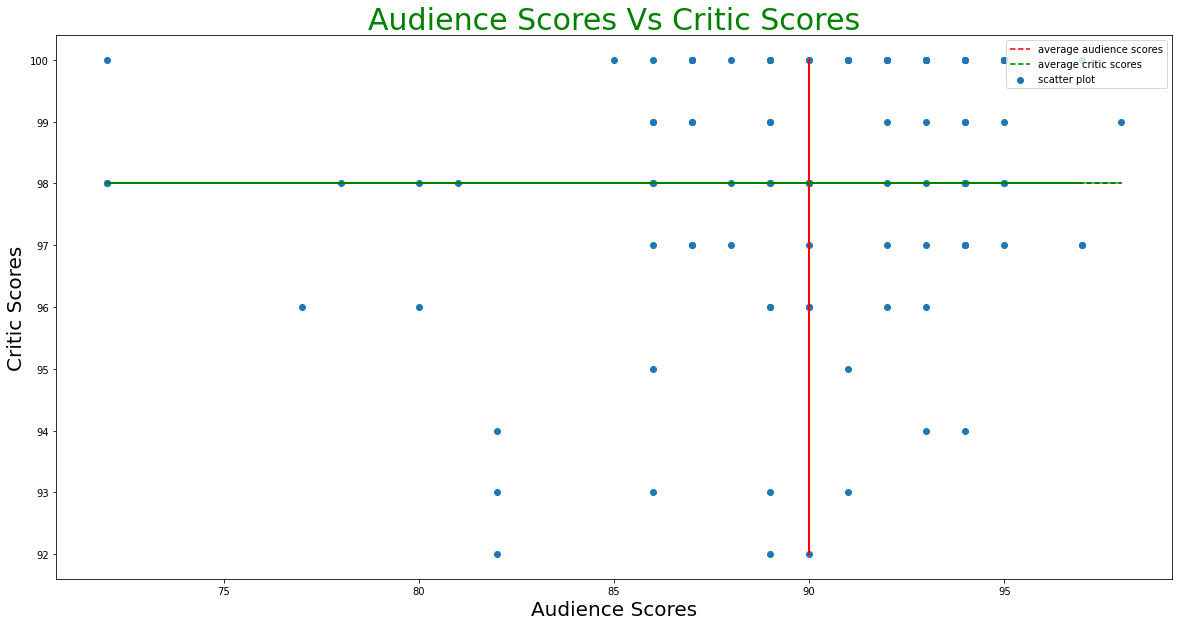

In [231]:
import numpy as np
import matplotlib.pyplot as plt
mean_aud = [np.ceil(np.mean(df.audience_score))] * len(df.audience_score)
mean_cri = [np.ceil(np.mean(df.critic))] * len(df.critic)
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(df.audience_score, df.critic, label='scatter plot')
ax.plot(mean_aud,df.critic, color='red', ls='--', label="average audience scores")
ax.plot(df.audience_score,mean_cri, color='green', ls='--', label="average critic scores")
plt.title('Audience Scores Vs Critic Scores',fontsize=30,color='green')
plt.xlabel('Audience Scores',fontsize=20)
plt.ylabel('Critic Scores',fontsize=20)
plt.legend(loc=1)
plt.show()